In [1]:
import re
import pandas as pd

In [2]:
f=open('whatsapp-chat-data.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

26/01/2020, 4:19 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
24/01/2020, 8:25 pm - Tanay Kamath (TSEC, CS) created group "CODERS👨‍💻👩‍💻🖥💻"
26/01/2020, 4:19 pm - You joined using this group's invite link
26/01/2020, 4:20 pm - +91 99871 38558 joined using this group's invite link
26/01/2020, 4:20 pm - +91 91680 38866 joined using this group's invite link
26/01/2020, 4:22 pm - +91 72762 35231 joined using this group's invite link
26/01/2020, 4:22 pm - +91 88392 06534 joined using this group's invite link
26/01/2020, 4:23 pm - +91 98709 38217 joined using this group's invite link
26/01/2020, 4:23 pm - +91 98702 02065 joined using this group's invite link
26/01/2020, 4:23 pm - +91 91370 44426 joined using this group's invite link
26/01/2020, 4:25 pm - +91 86559 19035 joined using this group's invite link
26/01/2020, 4:25 pm - +91 79778 39093 joined using this group's invite link
26/01/2020, 4

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages=re.split(pattern,data)[1:]
messages

[]

In [8]:
dates=re.split(pattern,data)
dates

['26/01/2020, 4:19 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n24/01/2020, 8:25 pm - Tanay Kamath (TSEC, CS) created group "CODERS👨\u200d💻👩\u200d💻🖥💻"\n26/01/2020, 4:19 pm - You joined using this group\'s invite link\n26/01/2020, 4:20 pm - +91 99871 38558 joined using this group\'s invite link\n26/01/2020, 4:20 pm - +91 91680 38866 joined using this group\'s invite link\n26/01/2020, 4:22 pm - +91 72762 35231 joined using this group\'s invite link\n26/01/2020, 4:22 pm - +91 88392 06534 joined using this group\'s invite link\n26/01/2020, 4:23 pm - +91 98709 38217 joined using this group\'s invite link\n26/01/2020, 4:23 pm - +91 98702 02065 joined using this group\'s invite link\n26/01/2020, 4:23 pm - +91 91370 44426 joined using this group\'s invite link\n26/01/2020, 4:25 pm - +91 86559 19035 joined using this group\'s invite link\n26/01/2020, 4:25 pm - +91 79778 39093 joined using this g

In [9]:
dates=re.findall(pattern,data)
dates

[]

In [10]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
#convert message_date type
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

Empty DataFrame
Columns: [user_message, date]
Index: []

In [11]:
df.shape

(0, 2)

In [12]:
#separate Users and Message
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [13]:
df.head()

Empty DataFrame
Columns: [date, user, message]
Index: []

In [15]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [16]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [17]:
df = rawToDf('whatsapp-chat-data.txt', '12hr')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


In [19]:
df.sample(10)

date_time                         user  \
10387 2020-08-24 13:40:00   Dheeraj Lalwani (TSEC, CS)   
12877 2020-09-24 23:14:00      Tanay Kamath (TSEC, CS)   
5567  2020-05-02 01:18:00      Tanay Kamath (TSEC, CS)   
13396 2020-09-30 00:10:00  Harsh Kapadia (TSEC IT, SE)   
7408  2020-06-12 23:40:00      Tanay Kamath (TSEC, CS)   
10144 2020-08-20 14:23:00              +91 97027 35002   
11356 2020-09-11 10:50:00   Dheeraj Lalwani (TSEC, CS)   
11422 2020-09-11 11:33:00              +91 80979 84068   
1592  2020-02-21 22:56:00              +91 83690 21693   
11050 2020-09-02 17:57:00      Tanay Kamath (TSEC, CS)   

                                                 message  
10387                                  Hell yeah 💯🔥😂😂🤘🏻   
12877          what is ECCF?Ig we dont have it this sem   
5567                                              noice   
13396                                     Just hold on.   
7408                               For projects,hell no   
10144                                             Sad:(   
11356  I'm also trying to understand and just keep kn...  
11422                                       Thank you!!   
1592   @919594949143  Try for(i=1;i<n;i++) {  for(j=0...  
11050                                     App Dev ka re

In [20]:
df.head()

date_time                user  \
0 2020-01-26 16:19:00  group_notification   
1 2020-01-24 20:25:00  group_notification   
2 2020-01-26 16:19:00  group_notification   
3 2020-01-26 16:20:00  group_notification   
4 2020-01-26 16:20:00  group_notification   

                                             message  
0  Messages and calls are end-to-end encrypted. N...  
1  Tanay Kamath (TSEC, CS) created group "CODERS👨...  
2         You joined using this group's invite link   
3  +91 99871 38558 joined using this group's invi...  
4  +91 91680 38866 joined using this group's invi...

In [21]:
df['year']=df['date_time'].dt.year

In [22]:
df.head()

date_time                user  \
0 2020-01-26 16:19:00  group_notification   
1 2020-01-24 20:25:00  group_notification   
2 2020-01-26 16:19:00  group_notification   
3 2020-01-26 16:20:00  group_notification   
4 2020-01-26 16:20:00  group_notification   

                                             message  year  
0  Messages and calls are end-to-end encrypted. N...  2020  
1  Tanay Kamath (TSEC, CS) created group "CODERS👨...  2020  
2         You joined using this group's invite link   2020  
3  +91 99871 38558 joined using this group's invi...  2020  
4  +91 91680 38866 joined using this group's invi...  2020

In [23]:
df['date_time'].dt.month_name()

0        January
1        January
2        January
3        January
4        January
          ...   
13650    October
13651    October
13652    October
13653    October
13654    October
Name: date_time, Length: 13655, dtype: object

In [24]:
df['month']=df['date_time'].dt.month_name()

In [25]:
df['day']=df['date_time'].dt.day

In [26]:
df['hour']=df['date_time'].dt.hour

In [27]:
df['minute']=df['date_time'].dt.minute

In [28]:
df.head()

date_time                user  \
0 2020-01-26 16:19:00  group_notification   
1 2020-01-24 20:25:00  group_notification   
2 2020-01-26 16:19:00  group_notification   
3 2020-01-26 16:20:00  group_notification   
4 2020-01-26 16:20:00  group_notification   

                                             message  year    month  day  \
0  Messages and calls are end-to-end encrypted. N...  2020  January   26   
1  Tanay Kamath (TSEC, CS) created group "CODERS👨...  2020  January   24   
2         You joined using this group's invite link   2020  January   26   
3  +91 99871 38558 joined using this group's invi...  2020  January   26   
4  +91 91680 38866 joined using this group's invi...  2020  January   26   

   hour  minute  
0    16      19  
1    20      25  
2    16      19  
3    16      20  
4    16      20

In [29]:
df[df['user'] == 'Tanay Kamath (TSEC, CS)'].shape

(2528, 8)

In [30]:
df['message']

0        Messages and calls are end-to-end encrypted. N...
1        Tanay Kamath (TSEC, CS) created group "CODERS👨...
2               You joined using this group's invite link 
3        +91 99871 38558 joined using this group's invi...
4        +91 91680 38866 joined using this group's invi...
                               ...                        
13650                                      MCQs mark kiya 
13651                                      Sign-in kiya😂😅 
13652                                    Incognito se na? 
13653                                                 Yup 
13654    guys, please do me a favor and vote in this po...
Name: message, Length: 13655, dtype: object

In [31]:
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. 
Tanay Kamath (TSEC, CS) created group "CODERS👨‍💻👩‍💻🖥💻" 
You joined using this group's invite link 
+91 99871 38558 joined using this group's invite link 
+91 91680 38866 joined using this group's invite link 
+91 72762 35231 joined using this group's invite link 
+91 88392 06534 joined using this group's invite link 
+91 98709 38217 joined using this group's invite link 
+91 98702 02065 joined using this group's invite link 
+91 91370 44426 joined using this group's invite link 
+91 86559 19035 joined using this group's invite link 
+91 79778 39093 joined using this group's invite link 
+91 98670 44401 joined using this group's invite link 
+91 84828 26061 joined using this group's invite link 
+91 96191 55044 joined using this group's invite link 
+91 99201 75875 joined using this group's invite link 
+91 87799 77656 joined using this group's inv

In [32]:
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['Tanay', 'Kamath', '(TSEC,', 'CS)', 'created', 'group', '"CODERS👨\u200d💻👩\u200d💻🖥💻"']
['You', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '99871', '38558', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '91680', '38866', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '72762', '35231', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '88392', '06534', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98709', '38217', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98702', '02065', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '91370', '44426', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '86559', '19035', 'joined', 'using', 'this', "group

In [33]:
words=[]
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['Tanay', 'Kamath', '(TSEC,', 'CS)', 'created', 'group', '"CODERS👨\u200d💻👩\u200d💻🖥💻"']
['You', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '99871', '38558', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '91680', '38866', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '72762', '35231', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '88392', '06534', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98709', '38217', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98702', '02065', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '91370', '44426', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '86559', '19035', 'joined', 'using', 'this', "group

In [34]:
words= []
for message in df['message']:
    words.extend(message.split())

In [35]:
len(words)

83155

In [38]:
df[df['message'] == '<Media omitted>\n'].shape[0]

0

In [40]:
df[df['message'].str.contains('<Media omitted>')].shape[0]

687

In [41]:
print(df)

                date_time                        user  \
0     2020-01-26 16:19:00          group_notification   
1     2020-01-24 20:25:00          group_notification   
2     2020-01-26 16:19:00          group_notification   
3     2020-01-26 16:20:00          group_notification   
4     2020-01-26 16:20:00          group_notification   
...                   ...                         ...   
13650 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13651 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13652 2020-10-02 02:11:00     Tanay Kamath (TSEC, CS)   
13653 2020-10-02 02:28:00   Darshan Rander (TSEC, IT)   
13654 2020-10-02 10:13:00  Dheeraj Lalwani (TSEC, CS)   

                                                 message  year    month  day  \
0      Messages and calls are end-to-end encrypted. N...  2020  January   26   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...  2020  January   24   
2             You joined using this group's invite link   2020  January   2

In [43]:
pip install urlextract

In [52]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Lets www.google.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in")
urls

['www.google.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [57]:
links = []
for message in df['message']:
    # print(message)
    links.extend(extractor.find_urls(message))

In [60]:
len(links)

727

In [59]:
links

['https://youtu.be/AU7mADJMa9Y',
 'https://youtu.be/aZu084TPInE',
 'http://meetu.ps/e/HKD5Q/BGt8n/d',
 'https://www.youtube.com/watch?v=fUqpYvIYj-Y',
 'https://www.youtube.com/playlist?list=PLDN4rrl48XKpZkf03iYFl-O29szjTrs_O',
 'https://youtu.be/4eWKHLSRHPY',
 'https://research.hackerrank.com/developer-skills/2020?utm_medium=social&utm_source=instagram&utm_campaign=021420&utm_content=IGPoll',
 'https://forms.gle/27DSsnJnBBMRy6Bt8',
 'https://code.dcoder.tech/files/code/5e3d7fad3975f256bf9d10e8/practice',
 'https://code.dcoder.tech/files/code/5e4a61595e611d351827daec/hell',
 'https://code.dcoder.tech/files/code/5e4c15209e436e412f89d805/right-angled-triangle',
 'https://forms.gle/Ui2Fb4BF2FTW5fhZA',
 'https://pastebin.com/cm0Y3fYv',
 'https://www.codechef.com/icpc',
 'https://chat.whatsapp.com/EbekhvkeUPcJYvfUs4M4js',
 'algo-web.netlify.com',
 'https://chat.whatsapp.com/Icy4PmWTNhC23uNPfg5dce',
 'https://pastebin.com/cm0Y3fYv',
 'https://youtu.be/UB1O30fR-EE',
 'https://youtu.be/yfoY53QX

In [48]:
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [49]:
len(y)

727

In [50]:
df

date_time                        user  \
0     2020-01-26 16:19:00          group_notification   
1     2020-01-24 20:25:00          group_notification   
2     2020-01-26 16:19:00          group_notification   
3     2020-01-26 16:20:00          group_notification   
4     2020-01-26 16:20:00          group_notification   
...                   ...                         ...   
13650 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13651 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13652 2020-10-02 02:11:00     Tanay Kamath (TSEC, CS)   
13653 2020-10-02 02:28:00   Darshan Rander (TSEC, IT)   
13654 2020-10-02 10:13:00  Dheeraj Lalwani (TSEC, CS)   

                                                 message  year    month  day  \
0      Messages and calls are end-to-end encrypted. N...  2020  January   26   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...  2020  January   24   
2             You joined using this group's invite link   2020  January   26   
3      +91 99871 38558 joined using this group's invi...  2020  January   26   
4      +91 91680 38866 joined using this group's invi...  2020  January   26   
...                                                  ...   ...      ...  ...   
13650                                    MCQs mark kiya   2020  October    2   
13651                                    Sign-in kiya😂😅   2020  October    2   
13652                                  Incognito se na?   2020  October    2   
13653                                               Yup   2020  October    2   
13654  guys, please do me a favor and vote in this po...  2020  October    2   

       hour  minute  
0        16      19  
1        20      25  
2        16      19  
3        16      20  
4        16      20  
...     ...     ...  
13650     2       5  
13651     2       5  
13652     2      11  
13653     2      28  
13654    10      13  

[13655 rows x 8 columns]

In [61]:
df

date_time                        user  \
0     2020-01-26 16:19:00          group_notification   
1     2020-01-24 20:25:00          group_notification   
2     2020-01-26 16:19:00          group_notification   
3     2020-01-26 16:20:00          group_notification   
4     2020-01-26 16:20:00          group_notification   
...                   ...                         ...   
13650 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13651 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13652 2020-10-02 02:11:00     Tanay Kamath (TSEC, CS)   
13653 2020-10-02 02:28:00   Darshan Rander (TSEC, IT)   
13654 2020-10-02 10:13:00  Dheeraj Lalwani (TSEC, CS)   

                                                 message  year    month  day  \
0      Messages and calls are end-to-end encrypted. N...  2020  January   26   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...  2020  January   24   
2             You joined using this group's invite link   2020  January   26   
3      +91 99871 38558 joined using this group's invi...  2020  January   26   
4      +91 91680 38866 joined using this group's invi...  2020  January   26   
...                                                  ...   ...      ...  ...   
13650                                    MCQs mark kiya   2020  October    2   
13651                                    Sign-in kiya😂😅   2020  October    2   
13652                                  Incognito se na?   2020  October    2   
13653                                               Yup   2020  October    2   
13654  guys, please do me a favor and vote in this po...  2020  October    2   

       hour  minute  
0        16      19  
1        20      25  
2        16      19  
3        16      20  
4        16      20  
...     ...     ...  
13650     2       5  
13651     2       5  
13652     2      11  
13653     2      28  
13654    10      13  

[13655 rows x 8 columns]

In [62]:
df['user'].value_counts().head()

user
Tanay Kamath (TSEC, CS)        2528
Dheeraj Lalwani (TSEC, CS)     1937
Darshan Rander (TSEC, IT)      1404
Kartik Soneji (TSEC, CS)        841
Harsh Kapadia (TSEC IT, SE)     790
Name: count, dtype: int64

In [63]:
import matplotlib.pyplot as plt

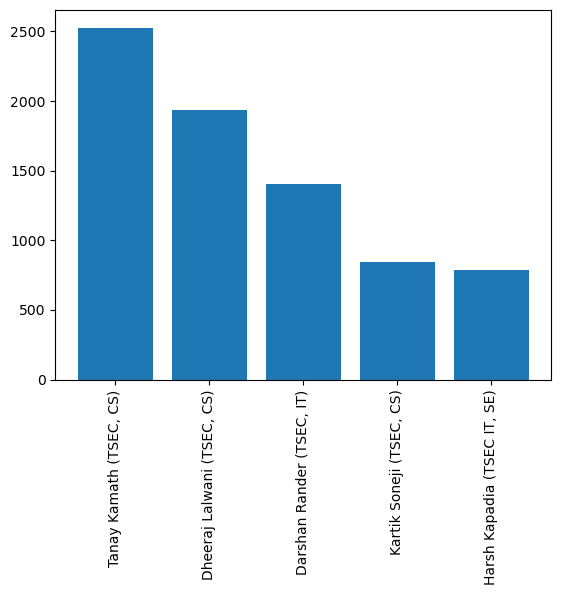

In [71]:
x=df['user'].value_counts().head()
name = x.index
count=x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
df['user'].value_counts()

user
Tanay Kamath (TSEC, CS)        2528
Dheeraj Lalwani (TSEC, CS)     1937
Darshan Rander (TSEC, IT)      1404
Kartik Soneji (TSEC, CS)        841
Harsh Kapadia (TSEC IT, SE)     790
                               ... 
+91 82080 03744                   1
+91 97698 67348                   1
+91 76663 28147                   1
+91 96194 00980                   1
+91 98709 38217                   1
Name: count, Length: 155, dtype: int64

In [73]:
df['user'].value_counts()/df.shape[0]

user
Tanay Kamath (TSEC, CS)        0.185134
Dheeraj Lalwani (TSEC, CS)     0.141853
Darshan Rander (TSEC, IT)      0.102819
Kartik Soneji (TSEC, CS)       0.061589
Harsh Kapadia (TSEC IT, SE)    0.057854
                                 ...   
+91 82080 03744                0.000073
+91 97698 67348                0.000073
+91 76663 28147                0.000073
+91 96194 00980                0.000073
+91 98709 38217                0.000073
Name: count, Length: 155, dtype: float64

In [74]:
(df['user'].value_counts()/df.shape[0])*100

user
Tanay Kamath (TSEC, CS)        18.513365
Dheeraj Lalwani (TSEC, CS)     14.185280
Darshan Rander (TSEC, IT)      10.281948
Kartik Soneji (TSEC, CS)        6.158916
Harsh Kapadia (TSEC IT, SE)     5.785427
                                 ...    
+91 82080 03744                 0.007323
+91 97698 67348                 0.007323
+91 76663 28147                 0.007323
+91 96194 00980                 0.007323
+91 98709 38217                 0.007323
Name: count, Length: 155, dtype: float64

In [75]:
round((df['user'].value_counts()/df.shape[0])*100,2)

user
Tanay Kamath (TSEC, CS)        18.51
Dheeraj Lalwani (TSEC, CS)     14.19
Darshan Rander (TSEC, IT)      10.28
Kartik Soneji (TSEC, CS)        6.16
Harsh Kapadia (TSEC IT, SE)     5.79
                               ...  
+91 82080 03744                 0.01
+91 97698 67348                 0.01
+91 76663 28147                 0.01
+91 96194 00980                 0.01
+91 98709 38217                 0.01
Name: count, Length: 155, dtype: float64

In [76]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

user  count
0        Tanay Kamath (TSEC, CS)  18.51
1     Dheeraj Lalwani (TSEC, CS)  14.19
2      Darshan Rander (TSEC, IT)  10.28
3       Kartik Soneji (TSEC, CS)   6.16
4    Harsh Kapadia (TSEC IT, SE)   5.79
..                           ...    ...
150              +91 82080 03744   0.01
151              +91 97698 67348   0.01
152              +91 76663 28147   0.01
153              +91 96194 00980   0.01
154              +91 98709 38217   0.01

[155 rows x 2 columns]

In [77]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

percent  count
0        Tanay Kamath (TSEC, CS)  18.51
1     Dheeraj Lalwani (TSEC, CS)  14.19
2      Darshan Rander (TSEC, IT)  10.28
3       Kartik Soneji (TSEC, CS)   6.16
4    Harsh Kapadia (TSEC IT, SE)   5.79
..                           ...    ...
150              +91 82080 03744   0.01
151              +91 97698 67348   0.01
152              +91 76663 28147   0.01
153              +91 96194 00980   0.01
154              +91 98709 38217   0.01

[155 rows x 2 columns]

In [78]:
round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})

percent  count
0        Tanay Kamath (TSEC, CS)  18.51
1     Dheeraj Lalwani (TSEC, CS)  14.19
2      Darshan Rander (TSEC, IT)  10.28
3       Kartik Soneji (TSEC, CS)   6.16
4    Harsh Kapadia (TSEC IT, SE)   5.79
..                           ...    ...
150              +91 82080 03744   0.01
151              +91 97698 67348   0.01
152              +91 76663 28147   0.01
153              +91 96194 00980   0.01
154              +91 98709 38217   0.01

[155 rows x 2 columns]

In [79]:
words=[]
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more. 
Tanay Kamath (TSEC, CS) created group "CODERS👨‍💻👩‍💻🖥💻" 
You joined using this group's invite link 
+91 99871 38558 joined using this group's invite link 
+91 91680 38866 joined using this group's invite link 
+91 72762 35231 joined using this group's invite link 
+91 88392 06534 joined using this group's invite link 
+91 98709 38217 joined using this group's invite link 
+91 98702 02065 joined using this group's invite link 
+91 91370 44426 joined using this group's invite link 
+91 86559 19035 joined using this group's invite link 
+91 79778 39093 joined using this group's invite link 
+91 98670 44401 joined using this group's invite link 
+91 84828 26061 joined using this group's invite link 
+91 96191 55044 joined using this group's invite link 
+91 99201 75875 joined using this group's invite link 
+91 87799 77656 joined using this group's inv

In [81]:
words=[]
for message in df['message']:
    print(message.split())

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.']
['Tanay', 'Kamath', '(TSEC,', 'CS)', 'created', 'group', '"CODERS👨\u200d💻👩\u200d💻🖥💻"']
['You', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '99871', '38558', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '91680', '38866', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '72762', '35231', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '88392', '06534', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98709', '38217', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '98702', '02065', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '91370', '44426', 'joined', 'using', 'this', "group's", 'invite', 'link']
['+91', '86559', '19035', 'joined', 'using', 'this', "group

In [82]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [89]:
df[df['user']=='group_notification']

date_time                user  \
0     2020-01-26 16:19:00  group_notification   
1     2020-01-24 20:25:00  group_notification   
2     2020-01-26 16:19:00  group_notification   
3     2020-01-26 16:20:00  group_notification   
4     2020-01-26 16:20:00  group_notification   
...                   ...                 ...   
13063 2020-09-25 11:11:00  group_notification   
13184 2020-09-28 13:34:00  group_notification   
13325 2020-09-28 21:25:00  group_notification   
13344 2020-09-29 08:38:00  group_notification   
13400 2020-09-30 01:06:00  group_notification   

                                                 message  year      month  \
0      Messages and calls are end-to-end encrypted. N...  2020    January   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...  2020    January   
2             You joined using this group's invite link   2020    January   
3      +91 99871 38558 joined using this group's invi...  2020    January   
4      +91 91680 38866 joined using this group's invi...  2020    January   
...                                                  ...   ...        ...   
13063             +91 80979 84068 added +91 73032 50500   2020  September   
13184                              +91 83789 81107 left   2020  September   
13325  Dheeraj Lalwani (TSEC, CS) added +91 91123 98322   2020  September   
13344                              +91 86059 72817 left   2020  September   
13400     Tanay Kamath (TSEC, CS) added +91 91362 39673   2020  September   

       day  hour  minute  
0       26    16      19  
1       24    20      25  
2       26    16      19  
3       26    16      20  
4       26    16      20  
...    ...   ...     ...  
13063   25    11      11  
13184   28    13      34  
13325   28    21      25  
13344   29     8      38  
13400   30     1       6  

[276 rows x 8 columns]

In [90]:
df[df['user']!='group_notification']

date_time                        user  \
113   2020-01-27 19:31:00             +91 96536 93868   
114   2020-01-27 19:31:00             +91 96536 93868   
115   2020-01-27 19:31:00  Dheeraj Lalwani (TSEC, CS)   
116   2020-01-27 19:32:00  Dheeraj Lalwani (TSEC, CS)   
117   2020-01-27 19:32:00             +91 96536 93868   
...                   ...                         ...   
13650 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13651 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13652 2020-10-02 02:11:00     Tanay Kamath (TSEC, CS)   
13653 2020-10-02 02:28:00   Darshan Rander (TSEC, IT)   
13654 2020-10-02 10:13:00  Dheeraj Lalwani (TSEC, CS)   

                                                 message  year    month  day  \
113                                     <Media omitted>   2020  January   27   
114                                  Give it a try ....   2020  January   27   
115                                             Alright   2020  January   27   
116                            We can make this a trend   2020  January   27   
117                                                Sure   2020  January   27   
...                                                  ...   ...      ...  ...   
13650                                    MCQs mark kiya   2020  October    2   
13651                                    Sign-in kiya😂😅   2020  October    2   
13652                                  Incognito se na?   2020  October    2   
13653                                               Yup   2020  October    2   
13654  guys, please do me a favor and vote in this po...  2020  October    2   

       hour  minute  
113      19      31  
114      19      31  
115      19      31  
116      19      32  
117      19      32  
...     ...     ...  
13650     2       5  
13651     2       5  
13652     2      11  
13653     2      28  
13654    10      13  

[13379 rows x 8 columns]

In [112]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']

In [113]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
# print(stop_words)

In [114]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [117]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(30))

0    1
0     <media  687
1   omitted>  687
2          😂  388
3    message  340
4    deleted  332
5          }  266
6          =  232
7         😂😂  230
8          {  210
9       code  131
10         👍  110
11      java  101
12     check   99
13      make   87
14    python   78
15   problem   76
16      send   74
17      work   72
18    google   72
19     start   71
20      nice   70
21        0;   70
22    right?   65
23       😂😂😂   64
24  question   62
25     error   59
26        10   58
27     great   58
28      link   58
29    return   58

In [83]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Tanay',
 'Kamath',
 '(TSEC,',
 'CS)',
 'created',
 'group',
 '"CODERS👨\u200d💻👩\u200d💻🖥💻"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '99871',
 '38558',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '91680',
 '38866',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '72762',
 '35231',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '88392',
 '06534',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '98709',
 '38217',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '98702',
 '02065',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '91370',
 '44426',
 'joined',
 'using',
 'this',

In [85]:
from collections import Counter
Counter(words)

Counter({'the': 1652,
         'to': 1275,
         'I': 1167,
         'is': 1135,
         'a': 1013,
         'and': 808,
         'it': 805,
         'you': 801,
         'in': 758,
         'for': 754,
         'of': 707,
         'this': 702,
         '<Media': 687,
         'omitted>': 687,
         'was': 584,
         'This': 471,
         'that': 437,
         'have': 402,
         'hai': 401,
         '😂': 388,
         'on': 385,
         'be': 382,
         'are': 361,
         'message': 339,
         'deleted': 332,
         'will': 320,
         'not': 318,
         'can': 317,
         'with': 310,
         'if': 293,
         'but': 287,
         'using': 273,
         '}': 266,
         'i': 250,
         'do': 245,
         '+91': 239,
         'so': 236,
         'all': 234,
         '=': 232,
         '😂😂': 230,
         'Yes': 212,
         'we': 211,
         '{': 210,
         'me': 207,
         'But': 203,
         'or': 198,
         'from': 198,
         'l

In [86]:
from collections import Counter
Counter(words).most_common(20)

[('the', 1652),
 ('to', 1275),
 ('I', 1167),
 ('is', 1135),
 ('a', 1013),
 ('and', 808),
 ('it', 805),
 ('you', 801),
 ('in', 758),
 ('for', 754),
 ('of', 707),
 ('this', 702),
 ('<Media', 687),
 ('omitted>', 687),
 ('was', 584),
 ('This', 471),
 ('that', 437),
 ('have', 402),
 ('hai', 401),
 ('😂', 388)]

In [87]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

0     1
0        the  1652
1         to  1275
2          I  1167
3         is  1135
4          a  1013
5        and   808
6         it   805
7        you   801
8         in   758
9        for   754
10        of   707
11      this   702
12    <Media   687
13  omitted>   687
14       was   584
15      This   471
16      that   437
17      have   402
18       hai   401
19         😂   388

In [ ]:
#remove_group messages
#remove media omitted message
#remove stop words